VIETNAM .shp file by district

In [38]:
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt
from useful_func import *
import numpy as np
from shapely.ops import unary_union
#url = "https://vi.wikipedia.org/wiki/Danh_s%C3%A1ch_%C4%91%C6%A1n_v%E1%BB%8B_h%C3%A0nh_ch%C3%ADnh_c%E1%BA%A5p_huy%E1%BB%87n_c%E1%BB%A7a_Vi%E1%BB%87t_Nam#Danh_s%C3%A1ch_c%C3%A1c_%C4%91%C6%A1n_v%E1%BB%8B_h%C3%A0nh_ch%C3%ADnh_c%E1%BA%A5p_huy%E1%BB%87n"
#tables = pd.read_html(url, encoding='utf-8')
#tables[0].to_csv('./raw/dist_list_wiki.csv', compression=None)

gdf = gpd.read_file("./diaphanhuyen/Dia_phan_Huyen.shp")
gdf = gdf.drop(columns=['OBJECTID', 'Dan_So', 'f_code', 'Nam_TK', 'Code_vung'], axis=1)
gdf.columns = ['region', 'dist', 'geometry']
r_dist = ['Q ', "Q.", "H.", "TP. ", "."]
gdf['region'] = gdf['region'].apply(lambda x: xoa_dau(x.upper()))
gdf['dist'] = gdf['dist'].apply(lambda x: xoa_dau(x.upper()))
for k in r_dist:
    gdf['dist'] = gdf['dist'].str.replace(k, "", regex=False)

gdf[gdf['region'] == "THANH HOA"]

,region,dist,geometry
359,THANH HOA,NONG CONG,"POLYGON ((105.65725 19.76022, 105.66515 19.759..."
360,THANH HOA,NHU XUAN,"POLYGON ((105.42562 19.76117, 105.43198 19.759..."
361,THANH HOA,SAM SON,"POLYGON ((105.93198 19.78324, 105.9313 19.7808..."
362,THANH HOA,QUANG XUONG,"POLYGON ((105.83608 19.78508, 105.83797 19.782..."
363,THANH HOA,NHU THANH,"POLYGON ((105.51841 19.80913, 105.51912 19.805..."
364,THANH HOA,DONG SON,"POLYGON ((105.69206 19.86597, 105.69808 19.861..."
365,THANH HOA,THANH HOA,"POLYGON ((105.77651 19.87327, 105.77998 19.870..."
366,THANH HOA,TRIEU SON,"POLYGON ((105.53096 19.89836, 105.54104 19.891..."
367,THANH HOA,HOANG HOA,"POLYGON ((105.76758 19.95833, 105.77131 19.955..."
368,THANH HOA,THIEU HOA,"POLYGON ((105.60332 19.96717, 105.61061 19.966..."


In [39]:
df = pd.read_csv('./raw/dist_list_wiki.csv', index_col=0)
df = df.drop(columns=["Số thứ tự", "Chú thích"], axis=1)
df.columns = ["dist", 'region', 'population', 'area_km2', 'density', 'adm_id']
df['region'] = df['region'].apply(lambda x: xoa_dau(x.upper()))
df['dist'] = df['dist'].apply(lambda x: xoa_dau(x.upper()))
m_replace = {"THANH PHO HO CHI MINH": "HO CHI MINH", 
             "TP.HO CHI MINH": "HO CHI MINH",
             " – ": " "} # - = U+2013
for k, v in m_replace.items():
    df['region'] = df['region'].str.replace(k, v, regex=False)
    df['dist'] = df['dist'].str.replace(k, v, regex=False)
df['population'] = df['population'].str.replace('.', "").str.replace(r"\[[0-9]+\]", '', regex=True).astype(int)
df['area_km2'] = df['area_km2'].str.replace('.', "").str.replace(r"\[[0-9]+\]", '', regex=True).str.replace(",", ".").astype(float)

df['density'] = df['density'].astype(str).str.replace('.', "").astype(float)

df['dist'] = df['dist'].str.replace(r'd{1,2}', r" d{1,2}", regex=True)
df = df.drop(columns='adm_id', axis=1)
df[df['region'] == "HA NOI"]

,dist,region,population,area_km2,density
14,BA DINH,HA NOI,221893,92.0,24119.0
20,BA VI,HA NOI,290580,4230.0,6870.0
33,BAC TU LIEM,HA NOI,340605,452.0,7529.0
100,CAU GIAY,HA NOI,292536,124.0,23516.0
130,CHUONG MY,HA NOI,337326,2374.0,1421.0
161,DAN PHUONG,HA NOI,174501,780.0,2237.0
179,DONG ANH,HA NOI,405749,1856.0,2186.0
180,DONG DA,HA NOI,371606,100.0,37161.0
211,GIA LAM,HA NOI,286102,1167.0,2452.0
227,HA DONG,HA NOI,397854,496.0,8021.0


In [40]:
import shapely
gdf = gdf.fillna(0)
gdf = gdf[gdf['dist'] != "HOANG SA"]
gdf = gdf[gdf['dist'] != "TRUONG SA"]
r2_dist = {"TP": "",
           ".": "",
           "-": " ",
           "QUI NHON": "QUY NHON",
           "TINH GIA": "NGHI SON",
           "QUANG 5": "QUAN 5",
           "QUAN 2": "THU DUC",
           "QUAN 9": "THU DUC",
           "HOOC MON": "HOC MON",
           "KRONG PAK": "KRONG PAC",
           "TU LIEM": "NAM TU LIEM",
           "TAY TRA": "TRA BONG",
           "HOANH BO": "HA LONG",
           "MY LOC": "NAM DINH",
           "DA KRONG": "DAKRONG",
           " HO CHI MINH": "HO CHI MINH"}
for k, v in r2_dist.items():
    gdf['region'] = gdf['region'].str.replace(k, v, regex=False)
    gdf['dist'] = gdf['dist'].str.replace(k, v, regex=False)

for col in df.columns[2:]:
    gdf[col] = gdf['dist'].map(dict(zip(df['dist'], df[col])))
    
result = gdf.groupby(['region', 'dist']).agg({'geometry': list}).reset_index()
print(result)
def join_polygon(plist):
    if len(plist) > 1:
        p = unary_union(plist)
    else: p = plist[0]
    return p

result['geometry'] = result['geometry'].apply(lambda x: join_polygon(x))
for col in df.columns[2:]:
    result[col] = result['dist'].map(dict(zip(df['dist'], df[col])))
#result = result[result['region'] == "HO CHI MINH"]
gdf = gpd.GeoDataFrame(result, geometry='geometry')


In [41]:
gdf['coords'] = gdf['geometry'].apply(lambda x: x.centroid.coords[:])
gdf['coords'] = [coords[0] for coords in gdf['coords']]
#gdf.to_csv("./cleaned/vietnam_adm_lvl2.csv", compression=None)
gdf.head(10)


,region,dist,geometry,population,area_km2,density,coords
0,AN GIANG,AN PHU,"POLYGON ((105.11296 10.96072, 105.11524 10.955...",148615.0,2262.0,6570.0,"(105.09805076904952, 10.84796399916337)"
1,AN GIANG,CHAU DOC,"POLYGON ((105.11173 10.72362, 105.11304 10.721...",101765.0,1052.0,9670.0,"(105.0849944500688, 10.677958464924219)"
2,AN GIANG,CHAU PHU,"POLYGON ((105.15772 10.70138, 105.16244 10.700...",206676.0,4507.0,4590.0,"(105.17805841162641, 10.558897388076344)"
3,AN GIANG,CHAU THANH,"POLYGON ((105.31986 10.50309, 105.32425 10.499...",144040.0,3431.0,4200.0,"(105.25730980679431, 10.42206902207808)"
4,AN GIANG,CHO MOI,"POLYGON ((105.36635 10.57852, 105.36863 10.575...",38958.0,6065.0,640.0,"(105.45800918025328, 10.472886974926828)"
5,AN GIANG,LONG XUYEN,"POLYGON ((105.4036 10.43894, 105.40667 10.4332...",272365.0,1154.0,236.0,"(105.42025591976152, 10.363110356194946)"
6,AN GIANG,PHU TAN,"POLYGON ((105.26774 10.76664, 105.2711 10.7655...",97703.0,4619.0,2180.0,"(105.27386511496519, 10.65663973317817)"
7,AN GIANG,TAN CHAU,"POLYGON ((105.15754 10.92304, 105.17211 10.915...",134743.0,1103.2,1220.0,"(105.18410415468338, 10.803043302743761)"
8,AN GIANG,THOAI SON,"POLYGON ((105.11638 10.3765, 105.12396 10.3744...",163427.0,4708.0,3470.0,"(105.2365744389718, 10.300497556552498)"
9,AN GIANG,TINH BIEN,"POLYGON ((105.02298 10.66566, 105.02361 10.664...",143098.0,3546.0,3060.0,"(105.00689305997399, 10.546946814180277)"


In [42]:
def calculate_angle(origin, target):
    dx = target[0] - origin[0]
    dy = target[1] - origin[1]
    angle = np.degrees(np.arctan2(dy, dx))
    return angle

def calculatedistance(center, origin):
    d_x = center[0]

def calculate_new_point(origin, angle, distance):
    angle_rad = np.radians(angle)
    x_new = origin[0] + distance * np.cos(angle_rad)
    y_new = origin[1] + distance * np.sin(angle_rad)
    return (x_new, y_new)   

In [43]:
from shapely.geometry import Point

def count_angle(angles):
    r_count, u_count, l_count, d_count = 0, 0, 0, 0
    for angle in angles:
        if  (angle > 315 and angle <= 360) or (angle > 0 and angle < 45):
            r_count += 1
        elif angle > 45 and angle <= 135: 
            u_count += 1
        elif angle > 135 and angle <= 225 :
            l_count += 1
        elif angle > 225 and angle <= 315:
            d_count += 1
    return [r_count, u_count, l_count, d_count]

def label_placement(angle_count, external_point, angle, buff):
    b_x, b_y = external_point[:] 
    if  (angle > 315 and angle <= 360) or (angle > 0 and angle < 45):  # Right of f_center
        horizontalalignment = 'left'
        verticalalignment = 'center'
        b_x += buff/3
    elif angle > 45 and angle <= 135:  # Up
        horizontalalignment = 'center'
        verticalalignment = 'top'
        b_y += buff  
    elif angle > 135 and angle <= 225 :# Left
        horizontalalignment = 'right'
        verticalalignment = 'center'
        b_x -= buff/3
    elif angle > 225 and angle <= 315: #Down 
        horizontalalignment = 'center'
        verticalalignment = 'bottom'
        b_y -= buff
    return tuple([b_x, b_y]), horizontalalignment, verticalalignment

def draw_labels(f, dist, ax):
    distance = dist
    f_union = f.geometry.union_all()
    f_center = f_union.centroid.coords[0]
    f['angle'] = [calculate_angle(f_center, coords) for coords in f['coords']]
    f = f.sort_values(by="angle").reset_index(drop=True)

    for idx, row in f.iterrows():
        coords = row['coords']
        angle = row['angle']%360
        external_point = calculate_new_point(coords, angle, distance)
        ex_x, ex_y = external_point
        buffs, h_align, v_align = label_placement(angle_count=count_angle(f['angle']), external_point=external_point, angle=angle, buff=0.03) 
        text = row['dist']
        
        if f_union.contains(Point(ex_x, ex_y)):
            line_color = 'green'
            text_color = 'green'
            distance += 0.1
        else:
            line_color = 'black'
            text_color = 'black'

        # Draw the line from the centroid to the external point
        ax.plot([coords[0], ex_x], [coords[1], ex_y], color=line_color)
        ax.annotate(text=text, xy=buffs, horizontalalignment=h_align, verticalalignment=v_align, fontname="Arial", fontsize=10, color=text_color)

def heatmap_plot(region: list, type: str, d_exclude: str):
    f = gdf[gdf['region'].isin(region)].copy()
    if d_exclude:
        f = f[~f['dist'].isin(d_exclude)]
    else:
        pass
    f_union = f.geometry.union_all()
    f_center = f_union.centroid.coords[0]
    f['angle'] = [calculate_angle(f_center, coords) for coords in f['coords']]
    f = f.sort_values(by="angle").reset_index(drop=True)
    
    print(count_angle(f['angle']))
    
    fig, ax = plt.subplots(1, 1, figsize=[10, 10])
    ax.set_axis_off()
    f.plot(column=type, legend=True, cmap='plasma', ax=ax)
    draw_labels(f=f, dist=0.3, ax=ax)
    plt.show()

# Check the type of 'f'
#f.head()


[1, 10, 6, 0]


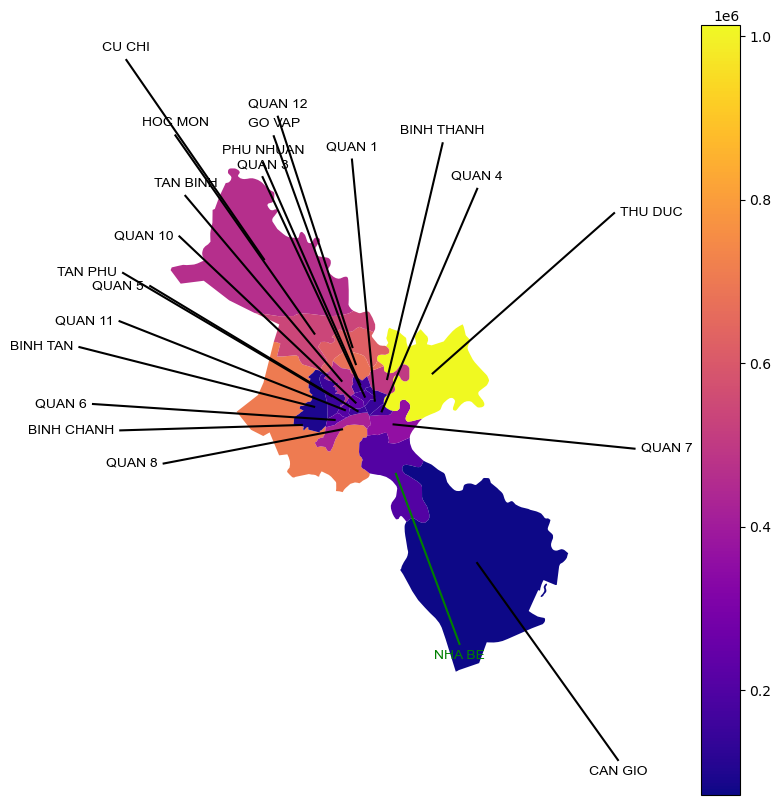

In [44]:
heatmap_plot(['HO CHI MINH'], "population", d_exclude=['BACH LONG VI'])

gdf['coords'] = gdf['geometry'].apply(lambda x: x.centroid.coords[:])
gdf['coords'] = [coords[0] for coords in gdf['coords']]


gdf.head(3)
fig, ax = plt.subplots(1, 1, figsize=[5, 5])
f = gdf[gdf['region'].isin(["HO CHI MINH"])]
f.plot(column="population", legend=True, cmap='plasma', ax=ax)


for idx, row in f.iterrows():
    ax.annotate(text=row['dist'], xy=row['coords'],
                 horizontalalignment='center', fontname="arial", fontsize=10, color="white")
type(f)